In [ ]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving winequality-red.csv to winequality-red.csv


In [ ]:
wine_df = pd.read_csv(io.BytesIO(uploaded['winequality-red.csv']))
print("Dataset Shape:", wine_df.shape)
#Check data distribution
wine_df.head()

Dataset Shape: (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#info about data columns
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**PLOT GRAPH FOR BETTER INSIGHT**

<Axes: xlabel='quality', ylabel='fixed acidity'>

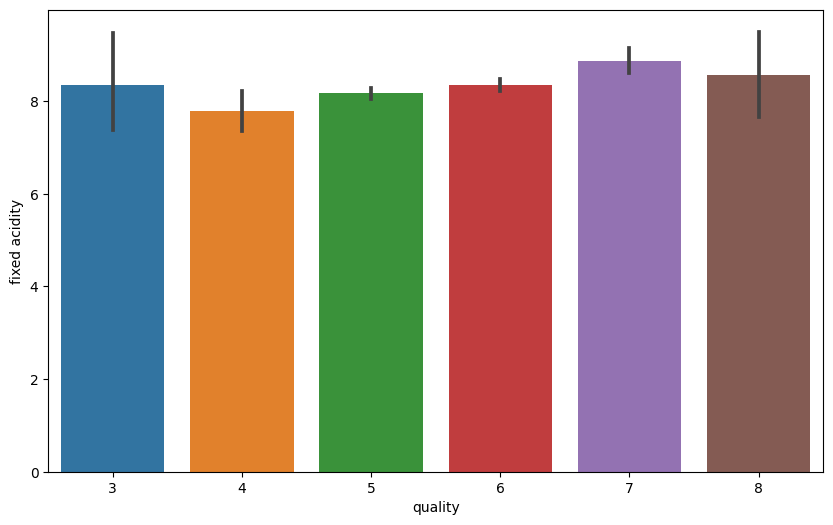

In [ ]:
# Acidity vs Quality
plt.figure(figsize = (10,6))
sns.barplot(x='quality', y='fixed acidity', data= wine_df)

<Axes: xlabel='quality', ylabel='volatile acidity'>

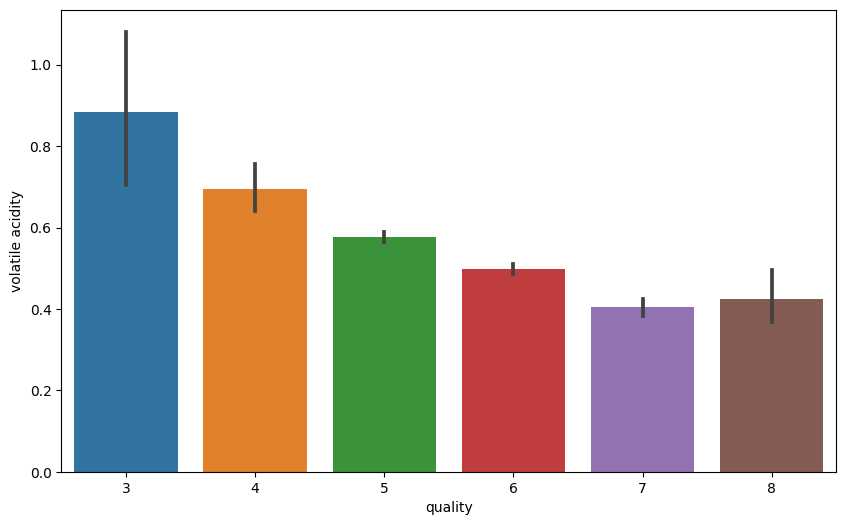

In [ ]:
# Volatile Acidity vs Quality
plt.figure(figsize = (10,6))
sns.barplot(x='quality', y='volatile acidity', data= wine_df)

<Axes: xlabel='quality', ylabel='citric acid'>

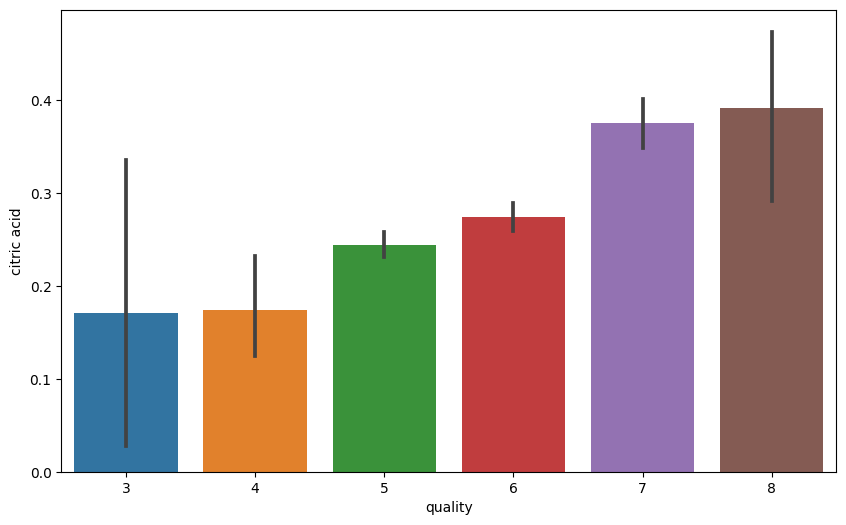

In [ ]:
# Citric Acid vs Quality
plt.figure(figsize = (10,6))
sns.barplot(x='quality', y='citric acid', data= wine_df)

<Axes: xlabel='quality', ylabel='residual sugar'>

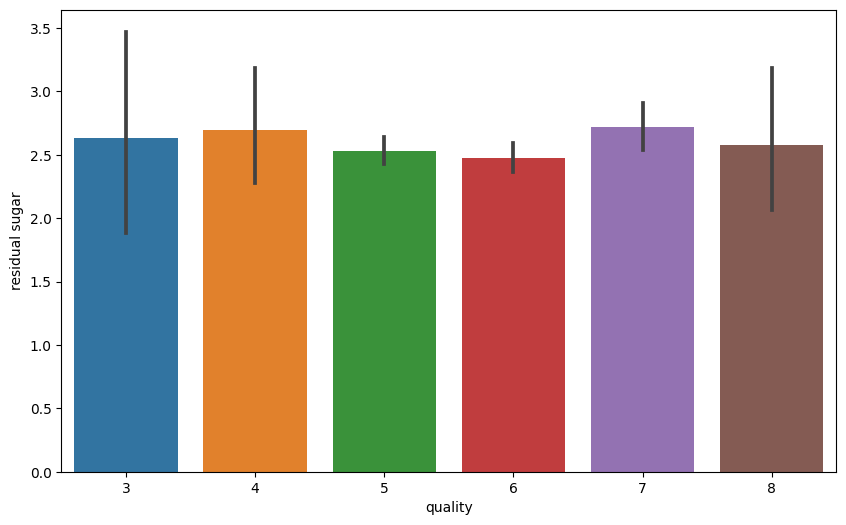

In [ ]:
# Residual Sugar vs Quality
plt.figure(figsize = (10,6))
sns.barplot(x='quality', y='residual sugar', data= wine_df)

<Axes: xlabel='quality', ylabel='chlorides'>

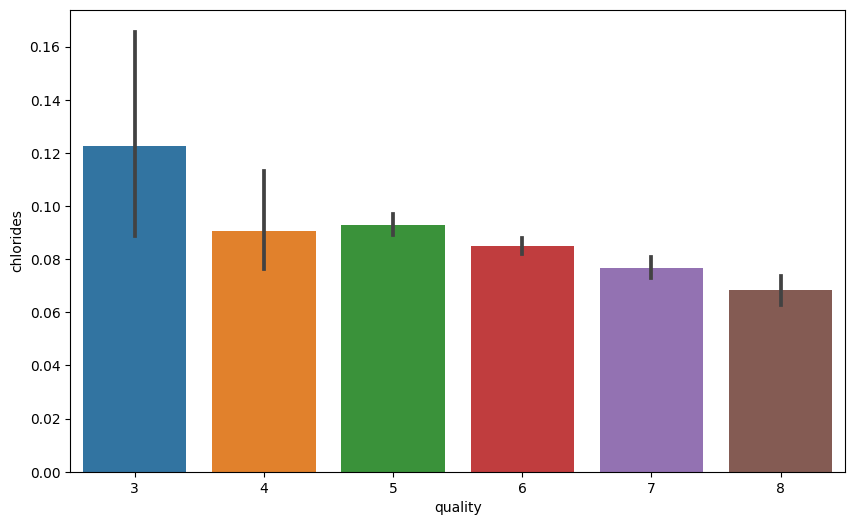

In [ ]:
# Chlorides vs Quality
plt.figure(figsize = (10,6))
sns.barplot(x='quality', y='chlorides', data= wine_df)

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

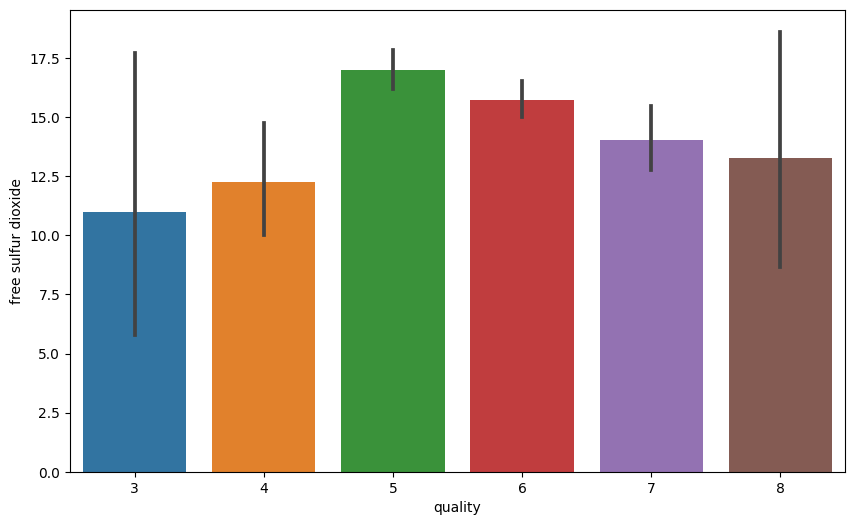

In [ ]:
# Free Sulphur Dioxide vs Quality
plt.figure(figsize = (10,6))
sns.barplot(x='quality', y='free sulfur dioxide', data= wine_df)

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

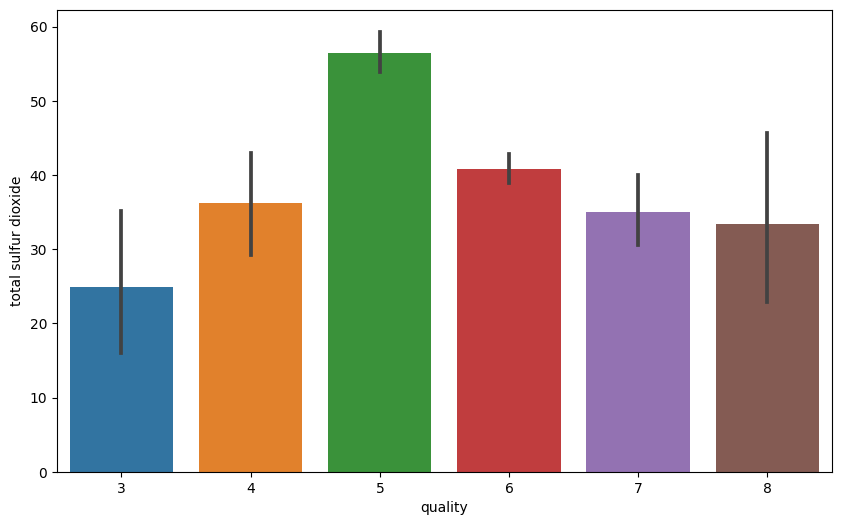

In [ ]:
# Total Sulphur Dioxide vs Quality
plt.figure(figsize = (10,6))
sns.barplot(x='quality', y='total sulfur dioxide', data= wine_df)

<Axes: xlabel='quality', ylabel='pH'>

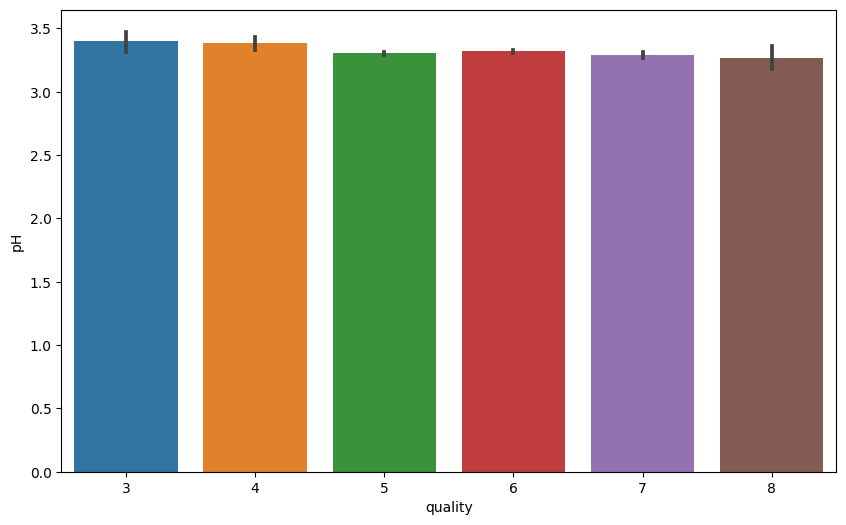

In [ ]:
# pH vs Quality
plt.figure(figsize = (10,6))
sns.barplot(x='quality', y='pH', data= wine_df)

<Axes: xlabel='quality', ylabel='sulphates'>

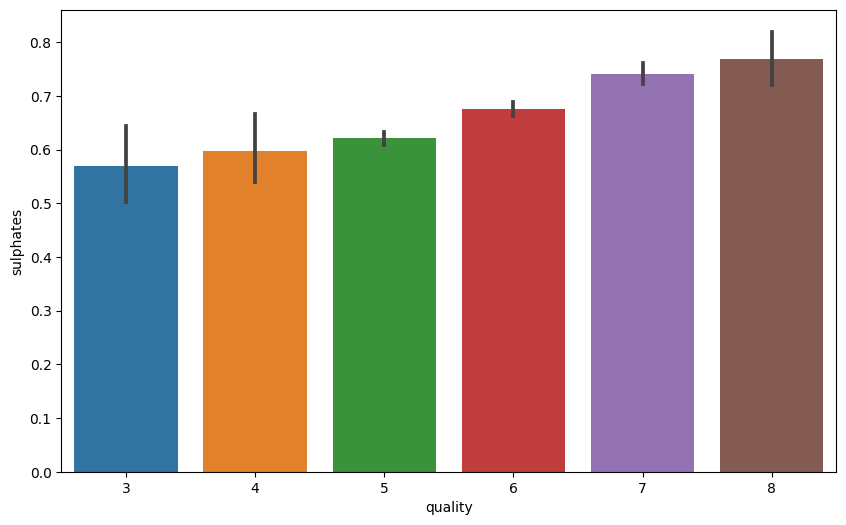

In [ ]:
# Sulphates vs Quality
plt.figure(figsize = (10,6))
sns.barplot(x='quality', y='sulphates', data= wine_df)

<Axes: xlabel='quality', ylabel='alcohol'>

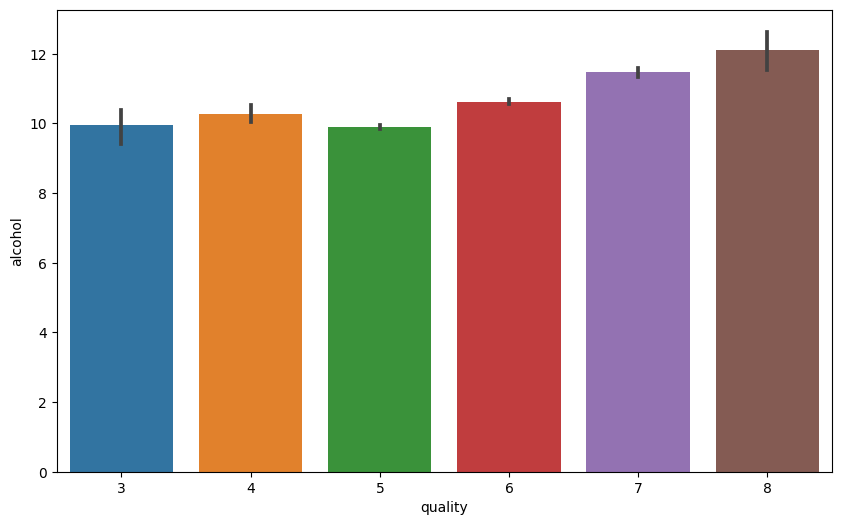

In [ ]:
# Alcohol vs Quality
plt.figure(figsize = (10,6))
sns.barplot(x='quality', y='alcohol', data= wine_df)

**PREPROCESSING DATA FOR ML ALGORITHM**

In [ ]:
wine_df ['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [ ]:
# Bad if inclusive (3, 6)
# Good if inclusive (7,8)

wine_df['quality'] = wine_df['quality'].apply(lambda x: 1 if x > 6.5 else 0)
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [ ]:
print(wine_df['quality'].value_counts())

fig = plt.figure(figsize = (10,6))

0    1382
1     217
Name: quality, dtype: int64


<Figure size 1000x600 with 0 Axes>

In [ ]:
# Seperate Dependent and Independent Variables

x = wine_df.iloc[:, :-1].values
y = wine_df.iloc[:, -1].values

In [ ]:
x

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [ ]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Splitting into training and testing Dataset

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state= 42)

print("X_train Shape:", x_train.shape)
print("X_Test Shape:", x_test.shape)
print("Y_train Shape:", y_train.shape)
print("Y_test Shape:", y_test.shape)

X_train Shape: (1279, 11)
X_Test Shape: (320, 11)
Y_train Shape: (1279,)
Y_test Shape: (320,)


In [ ]:
# Apply Standard Scaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

**APPLY ML ALGORITHMS**

1. RANDOM FOREST CLASSIFIER

In [ ]:
#Create Random Forest Classifier Instance

rf_regressor = RandomForestClassifier(n_estimators = 100)

#Fitting Classifier with train data
rf_regressor.fit(x_train, y_train)

#Prediction using classifier
y_pred = rf_regressor.predict(x_test)

[[261  12]
 [ 29  18]]


<Figure size 1000x600 with 0 Axes>

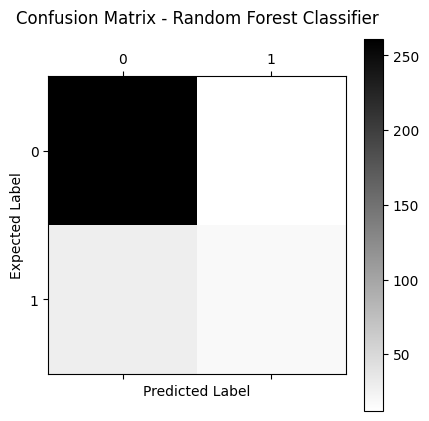

In [ ]:
#Confusion matrix using Random Forest Classifier

cm = confusion_matrix(y_test, y_pred)
print(cm)

#Matplot for Classifier
fig = plt.figure(figsize = (10,6))
plt.matshow(cm, cmap = plt.cm.binary, interpolation = 'nearest')
plt.title("Confusion Matrix - Random Forest Classifier\n")
plt.colorbar()
plt.ylabel("Expected Label")
plt.xlabel("Predicted Label")
plt.show()

In [ ]:
print("Total Predications", len(y_pred))
print("Correct Predictions", sum(y_pred == y_test))
print("Incorrect Predictions", sum(y_pred != y_test))
print("Accuracy", sum(y_pred == y_test)*100 / len(y_pred), "%")

Total Predications 320
Correct Predictions 279
Incorrect Predictions 41
Accuracy 87.1875 %


2. **SUPPORT VECTOR CLASSIFIER (SVC)**

In [ ]:
# SVC Instance
svc_regressor = SVC()

# Fit train Data
svc_regressor.fit(x_train, y_train)

# Prediction using SVC
y_pred = svc_regressor.predict(x_test)

[[268   5]
 [ 35  12]]


<Figure size 1000x600 with 0 Axes>

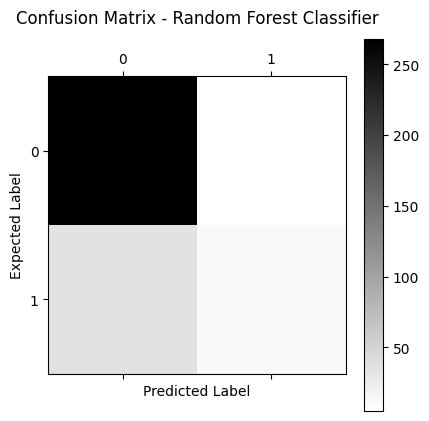

In [ ]:
#Confusion matrix for SVC

cm = confusion_matrix(y_test, y_pred)
print(cm)

#Matplot for Classifier
fig = plt.figure(figsize = (10,6))
plt.matshow(cm, cmap = plt.cm.binary, interpolation = 'nearest')
plt.title("Confusion Matrix - Random Forest Classifier\n")
plt.colorbar()
plt.ylabel("Expected Label")
plt.xlabel("Predicted Label")
plt.show()

In [ ]:
print("Total Predications", len(y_pred))
print("Correct Predictions", sum(y_pred == y_test))
print("Incorrect Predictions", sum(y_pred != y_test))
print("Accuracy", sum(y_pred == y_test)*100 / len(y_pred), "%")

Total Predications 320
Correct Predictions 280
Incorrect Predictions 40
Accuracy 87.5 %


**Tuning the ML Algorithms**

In [ ]:
# Finding Parameters for SVC

param = {
    'C' : [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4], 
    'kernel' : ['linear', 'rbf'],
    'gamma' : [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4] 
}

grid_svc = GridSearchCV(svc_regressor, param_grid = param, scoring = 'accuracy', cv = 10)

In [ ]:
grid_svc.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [ ]:
print("Best Parameters for SVC: ", grid_svc.best_params_)

Best Parameters for SVC:  {'C': 1.2, 'gamma': 0.9, 'kernel': 'rbf'}


[[271   2]
 [ 31  16]]


<Figure size 1000x600 with 0 Axes>

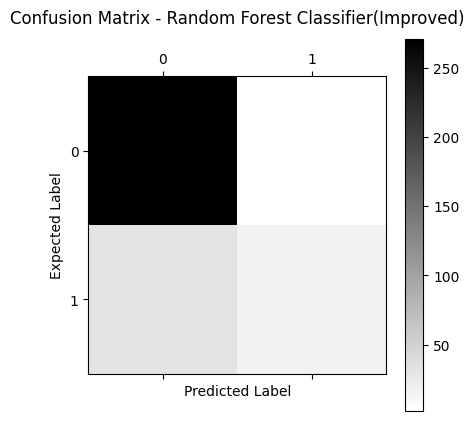

In [ ]:
svc_regressor2 = SVC(C = 1.2, gamma = 0.9, kernel = 'rbf')

svc_regressor2.fit(x_train, y_train)

y_pred_svc = svc_regressor2.predict(x_test)
#Improved Confusion matrix for SVC

cm_svc2 = confusion_matrix(y_test, y_pred_svc)
print(cm_svc2)

#Matplot for Classifier
fig = plt.figure(figsize = (10,6))
plt.matshow(cm_svc2, cmap = plt.cm.binary, interpolation = 'nearest')
plt.title("Confusion Matrix - Random Forest Classifier(Improved)\n")
plt.colorbar()
plt.ylabel("Expected Label")
plt.xlabel("Predicted Label")
plt.show()

In [ ]:
print("Total Predications", len(y_pred_svc))
print("Correct Predictions", sum(y_pred_svc == y_test))
print("Incorrect Predictions", sum(y_pred_svc != y_test))
print("Accuracy", sum(y_pred_svc == y_test)*100 / len(y_pred_svc), "%")

Total Predications 320
Correct Predictions 287
Incorrect Predictions 33
Accuracy 89.6875 %


2. RANDOM FOREST CLASSIFIER

In [ ]:
rf_eval = cross_val_score(estimator = rf_regressor, X = x_train, y = y_train, cv = 10)
rf_eval.mean()

0.9108821358267717

**CONCLUSION**

1. We created ML Classifiers for classifying if Wine is good quality or not
2. The Dataset contains almost 1600 sample data of wine and 12 fields of evaluation.
3. Random Forest Classifier accuracy = 88% (approx) and 91% after tuning
4. SVC Classifier with accuracy 87.5% and 90% (approx) after tuning

